In [27]:
%matplotlib inline
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
from PIL import Image


In [50]:
# image_directory = 'shapes_train_dataset/train/shapes_train2018/'
# annotation_file = 'shapes_train_dataset/train/annotations/instances_shape_train2018.json'
# image_directory = './pycococreator/examples/shapes/train/shapes_train2018/'
# annotation_file ='./pycococreator/examples/shapes/train/coco_train_tmp.json'

# image_directory = '/home/ccchang/disk2_1tb_ssd/robot_dataset/panel_exp_fixed/mycoco/coco_train/'
# annotation_file = '/home/ccchang/disk2_1tb_ssd/robot_dataset/panel_exp_fixed/mycoco/panel_coco.json'
# ann_root = '/home/ccchang/disk2_1tb_ssd/robot_dataset/panel_exp_fixed/mycoco/tmp_label/'

image_directory = '/home/ccchang/disk2_1tb_ssd/robot_dataset/panel_exp_fixed/mycoco/real_coco_train/'
annotation_file = '/home/ccchang/disk2_1tb_ssd/robot_dataset/panel_exp_fixed/mycoco/real_panel_coco.json'
ann_root = '/home/ccchang/disk2_1tb_ssd/robot_dataset/panel_exp_fixed/mycoco/real_coco_label/'


In [51]:
example_coco = COCO(annotation_file)
categories = example_coco.loadCats(example_coco.getCatIds())
category_names = [category['name'] for category in categories]
print('Custom COCO categories: \n{}\n'.format(' '.join(category_names)))

category_names = set([category['supercategory'] for category in categories])
print('Custom COCO supercategories: \n{}'.format(' '.join(category_names)))

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
Custom COCO categories: 
panel

Custom COCO supercategories: 
shape


In [52]:
category_ids = example_coco.getCatIds(catNms=['panel'])
image_ids = example_coco.getImgIds(catIds=category_ids)
image_data = example_coco.loadImgs(image_ids[np.random.randint(0, len(image_ids))])[0]


In [8]:
image_data

{'id': 11,
 'file_name': '6.png',
 'width': 480,
 'height': 640,
 'date_captured': '2020-01-27 05:15:25.590453',
 'license': 1,
 'coco_url': '',
 'flickr_url': ''}

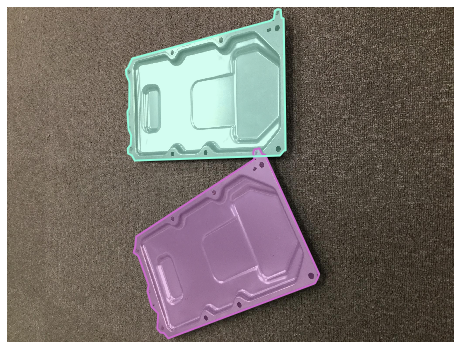

In [67]:

# load and display instance annotations
image_data = example_coco.loadImgs(image_ids[5])[0]
image = io.imread(image_directory + image_data['file_name'])
plt.imshow(image)
plt.axis('off')

pylab.rcParams['figure.figsize'] = (8.0, 10.0)
annotation_ids = example_coco.getAnnIds(imgIds=image_data['id'], catIds=category_ids, iscrowd=None)
annotations = example_coco.loadAnns(annotation_ids)
example_coco.showAnns(annotations)